In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv(r"C:\Users\User\Desktop\AIML\Aiml_learning\titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,2,"Johnson, Mrs. Oscar W",female,27.0,1,2,347742,11.1333,NaN,S
9,10,0,3,"Nasser, Mrs. Nicholas",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  20 non-null     int64  
 1   Survived     20 non-null     int64  
 2   Pclass       20 non-null     int64  
 3   Name         20 non-null     object 
 4   Sex          20 non-null     object 
 5   Age          19 non-null     float64
 6   SibSp        20 non-null     int64  
 7   Parch        20 non-null     int64  
 8   Ticket       20 non-null     object 
 9   Fare         20 non-null     float64
 10  Cabin        6 non-null      object 
 11  Embarked     20 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,20.00000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000
mean,10.50000,0.500000,2.200000,27.263158,0.700000,0.500000,23.113120
std,5.91608,0.512989,0.894427,15.754513,1.080935,1.192079,17.735348
min,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,7.250000
25%,5.75000,0.000000,1.000000,16.000000,0.000000,0.000000,8.356225
50%,10.50000,0.500000,2.500000,26.000000,0.000000,0.000000,17.350000
75%,15.25000,1.000000,3.000000,36.500000,1.000000,0.250000,29.361450
max,20.00000,1.000000,3.000000,58.000000,4.000000,5.000000,71.283300


In [10]:
df.isnull().sum

<bound method DataFrame.sum of     PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0         False     False   False  False  ...   False  False   True     False
1         False     False   False  False  ...   False  False  False     False
2         False     False   False  False  ...   False  False   True     False
3         False     False   False  False  ...   False  False  False     False
4         False     False   False  False  ...   False  False   True     False
5         False     False   False  False  ...   False  False   True     False
6         False     False   False  False  ...   False  False  False     False
7         False     False   False  False  ...   False  False   True     False
8         False     False   False  False  ...   False  False   True     False
9         False     False   False  False  ...   False  False   True     False
10        False     False   False  False  ...   False  False  False     False
11        False     False   False

In [ ]:

num_cols = df.select_dtypes(include=np.number).columns

imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])



In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,1,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,2,"Johnson, Mrs. Oscar W",female,27.0,1,2,347742,11.1333,NaN,S
9,10,0,3,"Nasser, Mrs. Nicholas",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
cat_cols = df.select_dtypes(include='object').columns

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,C103,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C103,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,C103,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,26.0,0.0,0.0,330877,8.4583,C103,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S
7,8.0,1.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3.0,1.0,349909,21.0750,C103,S
8,9.0,1.0,2.0,"Johnson, Mrs. Oscar W",female,27.0,1.0,2.0,347742,11.1333,C103,S
9,10.0,0.0,3.0,"Nasser, Mrs. Nicholas",female,14.0,1.0,0.0,237736,30.0708,C103,C


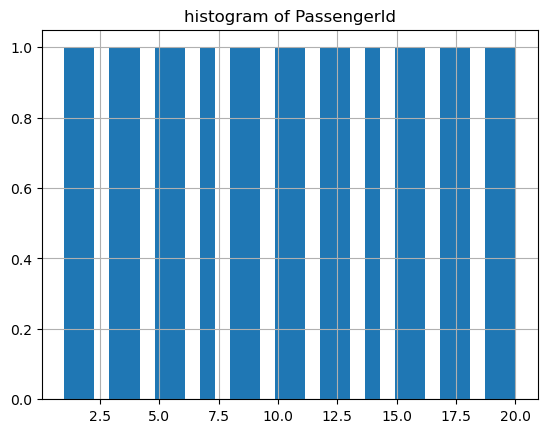

PassengerId skewness: 0.0


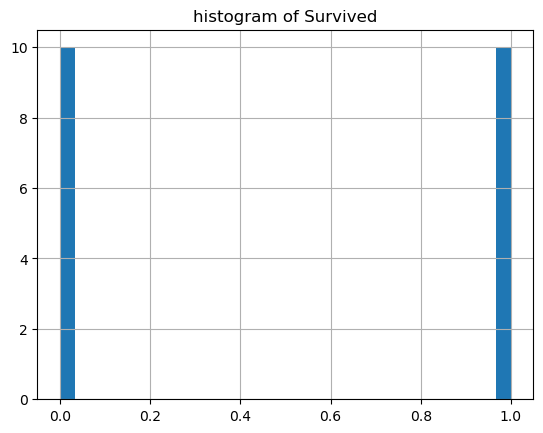

Survived skewness: 0.0


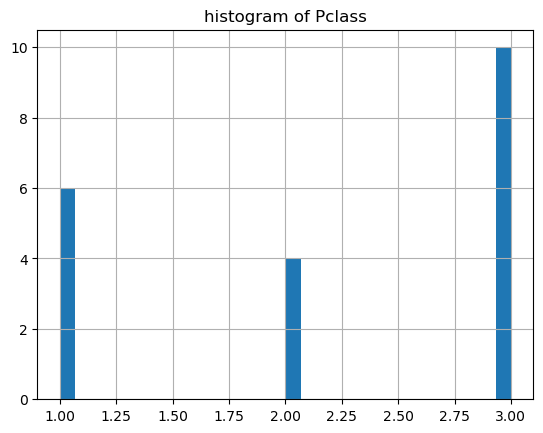

Pclass skewness: -0.4315218903946969


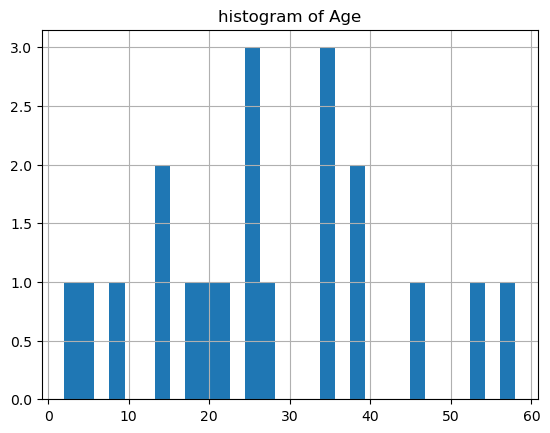

Age skewness: 0.2723048997897824


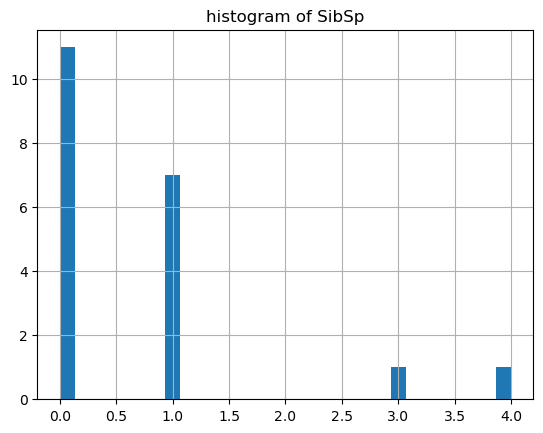

SibSp skewness: 2.061389146160769


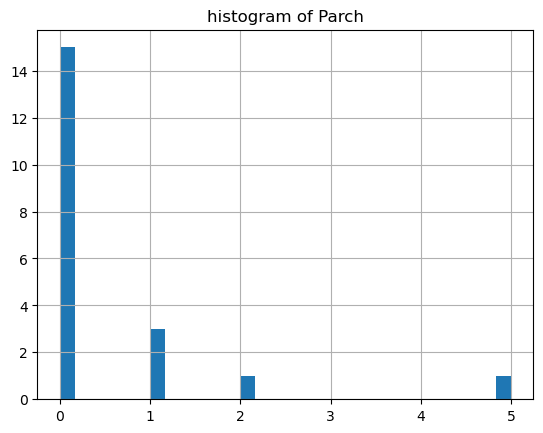

Parch skewness: 3.2104920095115674


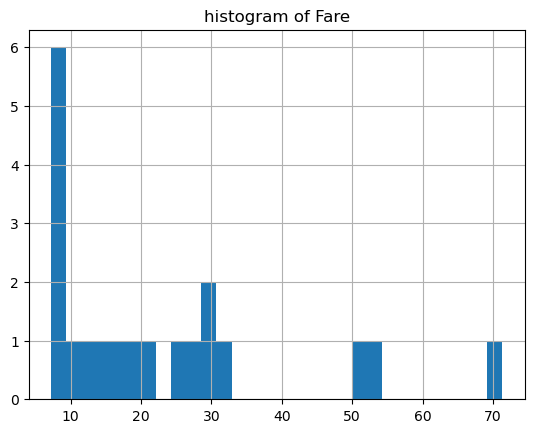

Fare skewness: 1.4574469572039332


In [19]:
for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'histogram of {col}')
    plt.show()

    print(f"{col} skewness: {df[col].skew()}")

In [ ]:
for col in num_cols:
    if df[col].skew() > 1:
        df[col] = np.log1p(df[col])

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,0.526589,0.000000,A/5 21171,2.110213,C103,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley",female,38.0,0.526589,0.000000,PC 17599,4.280593,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.000000,0.000000,STON/O2. 3101282,2.188856,C103,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath",female,35.0,0.526589,0.000000,113803,3.990834,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.000000,0.000000,373450,2.202765,C103,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,26.0,0.000000,0.000000,330877,2.246893,C103,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0.000000,0.000000,17463,3.967694,E46,S
7,8.0,1.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,0.869742,0.302171,349909,3.094446,C103,S
8,9.0,1.0,2.0,"Johnson, Mrs. Oscar W",female,27.0,0.526589,0.365497,347742,2.495954,C103,S
9,10.0,0.0,3.0,"Nasser, Mrs. Nicholas",female,14.0,0.526589,0.000000,237736,3.436268,C103,C


In [26]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


In [27]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1,22.0,0.526589,0.000000,A/5 21171,2.110213,C103,False,True
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley",0,38.0,0.526589,0.000000,PC 17599,4.280593,C85,False,False
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0,26.0,0.000000,0.000000,STON/O2. 3101282,2.188856,C103,False,True
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath",0,35.0,0.526589,0.000000,113803,3.990834,C123,False,True
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1,35.0,0.000000,0.000000,373450,2.202765,C103,False,True
5,6.0,0.0,3.0,"Moran, Mr. James",1,26.0,0.000000,0.000000,330877,2.246893,C103,True,False
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",1,54.0,0.000000,0.000000,17463,3.967694,E46,False,True
7,8.0,1.0,3.0,"Palsson, Master. Gosta Leonard",1,2.0,0.869742,0.302171,349909,3.094446,C103,False,True
8,9.0,1.0,2.0,"Johnson, Mrs. Oscar W",0,27.0,0.526589,0.365497,347742,2.495954,C103,False,True
9,10.0,0.0,3.0,"Nasser, Mrs. Nicholas",0,14.0,0.526589,0.000000,237736,3.436268,C103,False,False


In [29]:
scaler_std = StandardScaler()
df[num_cols] = scaler_std.fit_transform(df[num_cols])

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,-1.647509,-1.0,0.917663,"Braund, Mr. Owen Harris",1,-0.347859,0.774715,-0.569070,A/5 21171,-1.284739,C103,False,True
1,-1.474087,1.0,-1.376494,"Cumings, Mrs. John Bradley",0,0.722477,0.774715,-0.569070,PC 17599,2.006188,C85,False,False
2,-1.300665,1.0,0.917663,"Heikkinen, Miss. Laina",0,-0.080275,-0.851652,-0.569070,STON/O2. 3101282,-1.165494,C103,False,True
3,-1.127243,1.0,-1.376494,"Futrelle, Mrs. Jacques Heath",0,0.521789,0.774715,-0.569070,113803,1.566829,C123,False,True
4,-0.953821,-1.0,0.917663,"Allen, Mr. William Henry",1,0.521789,-0.851652,-0.569070,373450,-1.144404,C103,False,True
5,-0.780399,-1.0,0.917663,"Moran, Mr. James",1,-0.080275,-0.851652,-0.569070,330877,-1.077494,C103,True,False
6,-0.606977,-1.0,-1.376494,"McCarthy, Mr. Timothy J",1,1.792813,-0.851652,-0.569070,17463,1.531742,E46,False,True
7,-0.433555,1.0,0.917663,"Palsson, Master. Gosta Leonard",1,-1.685779,1.834540,1.453781,349909,0.207643,C103,False,True
8,-0.260133,1.0,-0.229416,"Johnson, Mrs. Oscar W",0,-0.013379,0.774715,1.877710,347742,-0.699845,C103,False,True
9,-0.086711,-1.0,0.917663,"Nasser, Mrs. Nicholas",0,-0.883027,0.774715,-0.569070,237736,0.725946,C103,False,False


In [31]:
num_df = df.select_dtypes(include='number')

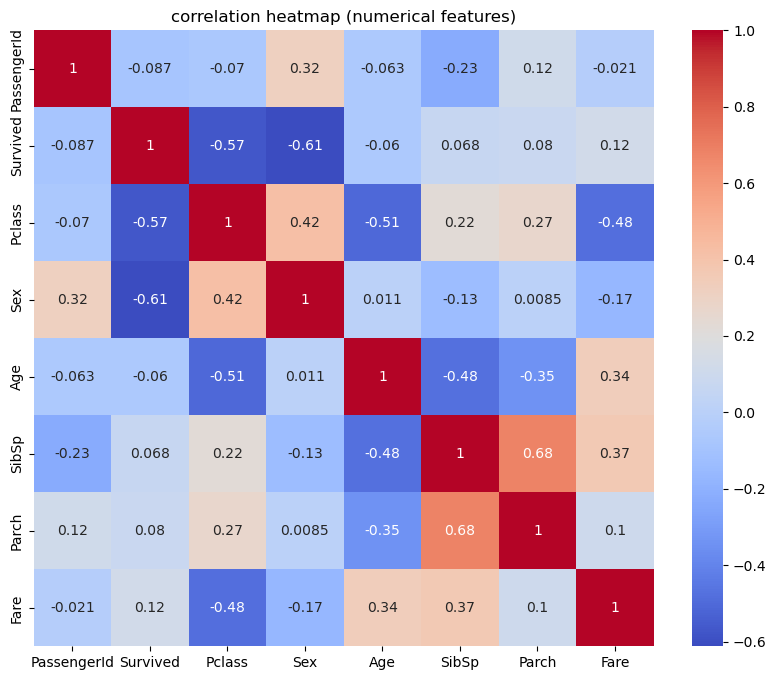

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("correlation heatmap (numerical features)")
plt.show()

In [34]:
x = df.drop('Survived', axis=1)
y = df['Survived']

In [36]:
x_num = x.select_dtypes(include='number')


In [39]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
x_new = selector.fit_transform(x_num, y)

In [40]:
selected_features = x_num.columns[selector.get_support()]
print(selected_features)

Index(['PassengerId', 'Pclass', 'Sex', 'Parch', 'Fare'], dtype='object')


In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [47]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.75
